# Importing the necessary Libraries

In [33]:
import os
import cv2
import json
from glob import glob

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from PIL import Image
from torchvision import transforms

### Sample Images list

In [6]:
images = glob(r'D:\Datasets\leftImg8bit ALL\leftImg8bit\train\aachen\*.png')

# Data Resolution and Channels

In [8]:
img_arr = cv2.imread(images[0])
height, width, channels = img_arr.shape
print(f"Image Dimensions: {width} x {height}")
print(f"Number of Channels: {channels}")

Image Dimensions: 2048 x 1024
Number of Channels: 3


In [10]:
# Aspect Ratio
print(f'Aspect ratio is {width/height:.2f}')

Aspect ratio is 2.00


# Data Composition (Train, val, test)

### Train

In [12]:
cities = ['aachen', 'bochum', 'bremen', 'cologne', 'darmstadt', 'dusseldorf', 'erfurt', 'hamburg', 'hanover', 'jena', 'krefeld', 'monchengladbach', 'strasbourg', 'stuttgart', 'tubingen', 'ulm', 'weimar', 'zurich']
total_train_img = 0
for i in cities:
    train_images = glob(f'D:\\Datasets\\leftImg8bit ALL\\leftImg8bit\\train\\{i}\\*.png')
    total_train_img = total_train_img + len(train_images)
print(total_train_img)

2975


### Validation

In [13]:
val_cities = ['frankfurt', 'lindau', 'munster']
tot_val_img = 0
for i in val_cities:
    val_images = glob(f'D:\\Datasets\\leftImg8bit ALL\\leftImg8bit\\val\\{i}\\*.png')
    tot_val_img = tot_val_img + len(val_images)
print(tot_val_img)

500


### Test

In [14]:
test_cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
tot_test_img = 0
for i in test_cities:
    test_images = glob(f'D:\\Datasets\\leftImg8bit ALL\\leftImg8bit\\test\\{i}\\*.png')
    tot_test_img = tot_test_img + len(test_images)
print(tot_test_img)

1525


#### Total Images and percentage composition 

In [15]:
total = total_train_img + tot_val_img + tot_test_img
print(f'Total Images are {total}')
print(f'Train images are {total_train_img*100/total}%, Validation Images are {tot_val_img*100/total}%, Test Images are {tot_test_img*100/total}%')

Total Images are 5000
Train images are 59.5%, Validation Images are 10.0%, Test Images are 30.5%


# Pixel and Color Intensity distribution

#### Pixel Intensity Distribution

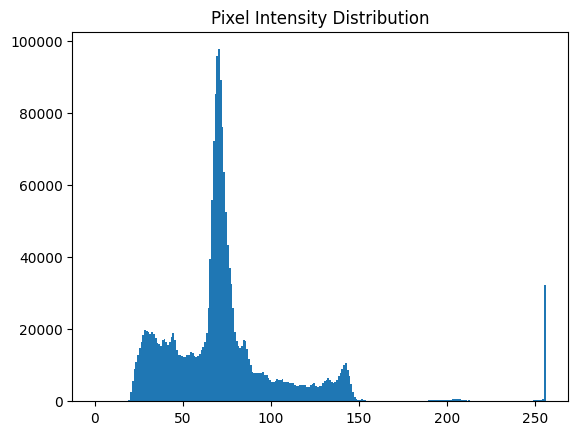

In [17]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title('Pixel Intensity Distribution')
plt.show()

#### Color distribution in RGB

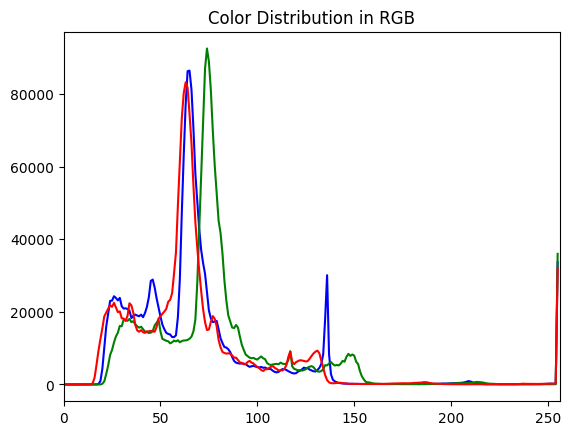

In [19]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([cv2.imread(images[0])], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Color Distribution in RGB')
plt.show()

# Blurriness Score on Laplacian scale

In [21]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

blur_score = variance_of_laplacian(gray_image)
print(f"Blurriness Score: {blur_score}")

Blurriness Score: 48.25040710815517


# Edge detection Annotation using Canny on grey scale

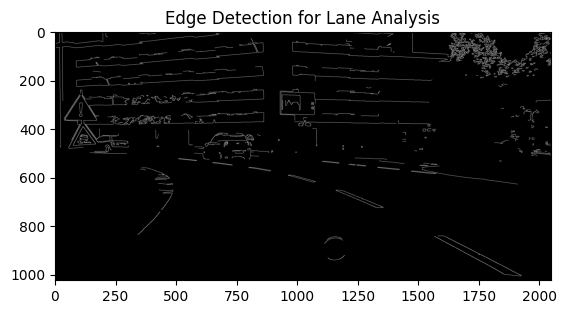

In [22]:
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection for Lane Analysis')
plt.show()

# Resizing the Image

In [23]:
def resize_image(image_array, size=(512, 256)):
                             
    image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)  
    image_resized = cv2.resize(image, size)
    return image_resized

In [25]:
resized = resize_image(cv2.imread(images[0]), size=(512, 256))
print(resized)

[[[174 206 202]
  [177 208 202]
  [176 207 201]
  ...
  [ 39  57  45]
  [ 35  49  37]
  [ 33  45  35]]

 [[175 203 200]
  [177 206 201]
  [174 206 200]
  ...
  [ 29  41  33]
  [ 32  44  35]
  [ 31  51  38]]

 [[172 204 201]
  [176 205 201]
  [174 204 200]
  ...
  [ 27  38  31]
  [ 31  49  42]
  [ 64  88  67]]

 ...

 [[ 84 103  85]
  [ 83 101  82]
  [ 85 102  84]
  ...
  [ 54  71  61]
  [ 55  70  62]
  [ 55  71  63]]

 [[ 82 101  83]
  [ 84 102  85]
  [ 81  99  83]
  ...
  [ 55  71  61]
  [ 52  69  61]
  [ 55  70  63]]

 [[ 82  98  82]
  [ 80  98  80]
  [ 82  98  81]
  ...
  [ 55  71  63]
  [ 55  71  62]
  [ 55  71  62]]]


# Normalization between [0 1]

In [26]:
def normalize_image(image):
    return image / 255.0

In [27]:
norm = normalize_image(resized)
print(norm)

[[[0.68235294 0.80784314 0.79215686]
  [0.69411765 0.81568627 0.79215686]
  [0.69019608 0.81176471 0.78823529]
  ...
  [0.15294118 0.22352941 0.17647059]
  [0.1372549  0.19215686 0.14509804]
  [0.12941176 0.17647059 0.1372549 ]]

 [[0.68627451 0.79607843 0.78431373]
  [0.69411765 0.80784314 0.78823529]
  [0.68235294 0.80784314 0.78431373]
  ...
  [0.11372549 0.16078431 0.12941176]
  [0.1254902  0.17254902 0.1372549 ]
  [0.12156863 0.2        0.14901961]]

 [[0.6745098  0.8        0.78823529]
  [0.69019608 0.80392157 0.78823529]
  [0.68235294 0.8        0.78431373]
  ...
  [0.10588235 0.14901961 0.12156863]
  [0.12156863 0.19215686 0.16470588]
  [0.25098039 0.34509804 0.2627451 ]]

 ...

 [[0.32941176 0.40392157 0.33333333]
  [0.3254902  0.39607843 0.32156863]
  [0.33333333 0.4        0.32941176]
  ...
  [0.21176471 0.27843137 0.23921569]
  [0.21568627 0.2745098  0.24313725]
  [0.21568627 0.27843137 0.24705882]]

 [[0.32156863 0.39607843 0.3254902 ]
  [0.32941176 0.4        0.33333333]


# Dataset Integrity Verification

In [31]:
def check_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Corrupted image: {image_path}")
    except:
        print(f"Error reading: {image_path}")

def check_json(json_path):
    try:
        with open(json_path, 'r') as file:
            json.load(file)
    except:
        print(f"Error {json_path}")

### For raw images of Dataset

In [29]:
a = 0
b = 0
c = 0
for i in ['train', 'val', 'test']:
    if i == 'train':
        for j in cities:
            im = glob(f'D:\\Datasets\\leftImg8bit ALL\\leftImg8bit\\{i}\\{j}\\*.png')
            for k in im:
                check_image(k)
                a = a + 1
    elif i == 'val':
        for j in val_cities:
            im = glob(f'D:\\Datasets\\leftImg8bit ALL\\leftImg8bit\\{i}\\{j}\\*.png')
            for k in im:
                check_image(k)
                b = b + 1
    else:
        for j in test_cities:
            im = glob(f'D:\\Datasets\\leftImg8bit ALL\\leftImg8bit\\{i}\\{j}\\*.png')
            for k in im:
                check_image(k)
                c = c + 1

print(a, b, c)

2975 500 1525


### For Annotated Counter parts (.png & .json) of the Images

In [30]:
d = 0
e = 0
f = 0
for i in ['train', 'val', 'test']:
    if i == 'train':
        for j in cities:
            im = glob(f'D:\\Datasets\\gtfine ALL\\gtFine\\{i}\\{j}\\*.png')
            for k in im:
                check_image(k)
                d = d + 1
    elif i == 'val':
        for j in val_cities:
            im = glob(f'D:\\Datasets\\gtfine ALL\\gtFine\\{i}\\{j}\\*.png')
            for k in im:
                check_image(k)
                e = e + 1
    else:
        for j in test_cities:
            im = glob(f'D:\\Datasets\\gtfine ALL\\gtFine\\{i}\\{j}\\*.png')
            for k in im:
                check_image(k)
                f = f + 1

print(d, e, f)

8925 1500 4575


In [34]:
g = 0
h = 0
z = 0
for i in ['train', 'val', 'test']:
    if i == 'train':
        for j in cities:
            im = glob(f'D:\\Datasets\\gtfine ALL\\gtFine\\{i}\\{j}\\*.json')
            for k in im:
                check_json(k)
                g = g + 1
    elif i == 'val':
        for j in val_cities:
            im = glob(f'D:\\Datasets\\gtfine ALL\\gtFine\\{i}\\{j}\\*.json')
            for k in im:
                check_json(k)
                h = h + 1
    else:
        for j in test_cities:
            im = glob(f'D:\\Datasets\\gtfine ALL\\gtFine\\{i}\\{j}\\*.json')
            for k in im:
                check_json(k)
                z = z + 1

print(g, h, z)

2975 500 1525
